In [35]:
# Import Dependencies 
import tweepy
import json
import pandas as pd
import numpy as np
import os
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import datetime as datetime
import time

# Twitter API Keys
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
orig_working_directory= os.getcwd()
print(orig_working_directory)

/Users/heatherjanemoore/GWU-HJM-PythonAPI/Twitter-API-Instructions


In [3]:
# Set Target Search Term
target_terms = ('@bbcworld', '@cbsnews', '@cnn', '@foxnews', '@nytimes')

# News Org Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500

# List to hold results
tweets_list = []
search_term_list = []

In [4]:
# Loop through all targets
for target in target_terms:
    for tweet in tweepy.Cursor(api.search, target, tweet_mode='extended').items(100):
        tweets_list.append(tweet)    
        search_term_list.append(target)

In [5]:
tweets_list[0]

Status(_api=<tweepy.api.API object at 0x10b814ad0>, _json={'created_at': 'Sat May 23 00:55:22 +0000 2020', 'id': 1263996910945349633, 'id_str': '1263996910945349633', 'full_text': 'RT @BBCWorld: President Trump says churches are "essential services" and he will "override governors" so they can reopen https://t.co/jVx7j…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'BBCWorld', 'name': 'BBC News (World)', 'id': 742143, 'id_str': '742143', 'indices': [3, 12]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1245120625116696577, 'id_str': '1245120625116696577', 'name': 'Nana Omari', 'screen_name': 'NanaOmari7', 'loca

In [59]:
#create lists 
user_list = []
tweet_text_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
timestamp_list = []

# Loop through all tweets
for tweet in tweets_list:
    if(
        True
    ):
        # Run Vader Analysis on each tweet
        tweet_user = tweet.user.screen_name
        tweet_text = tweet.full_text
        results = analyzer.polarity_scores(tweet_text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        timestamp = tweet.created_at.timestamp()
    
        # Add each value to the appropriate list
        user_list.append(tweet_user)
        tweet_text_list.append(tweet_text)
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        timestamp_list.append(timestamp)

In [42]:
#Put results into a DataFrame
    'User': user_list,
    'Search Term': search_term_list,
    'Tweet Text': tweet_text_list,
    'Compound Score': compound_list,
    'Positive': positive_list,
    'Neutral': negative_list,
    'Negative': neutral_list,
    'Timestamp': timestamp_list
})

pd.set_option('display.max_colwidth', -1)

results_df

,User,Search Term,Tweet Text,Compound Score,Positive,Neutral,Negative,Timestamp
0,NanaOmari7,@bbcworld,"RT @BBCWorld: President Trump says churches are ""essential services"" and he will ""override governors"" so they can reopen https://t.co/jVx7j…",0.0000,0.000,0.000,1.000,1.590210e+09
1,sweepsgal1961,@bbcworld,"RT @BBCWorld: Trump drug hydroxychloroquine raises death risk in Covid patients, study says https://t.co/6FAo3QSOyS",-0.7184,0.000,0.333,0.667,1.590210e+09
2,Nuahs81,@bbcworld,RT @BBCWorld: Son of murdered Saudi journalist Jamal Khashoggi releases statement forgiving his killers https://t.co/8ZyDLovynb,-0.7783,0.123,0.369,0.508,1.590210e+09
3,laradioonline,@bbcworld,RT @BBCWorld: Brazil court releases foul-mouthed Bolsonaro video https://t.co/Nq4ZgEvxll,0.0000,0.000,0.000,1.000,1.590210e+09
4,apandit1947,@bbcworld,RT @SheebaAslamFehm: Those who think that it is only the fringe elements who are showing bad behaviour and animosity against Muslims may ch…,-0.7506,0.000,0.234,0.766,1.590210e+09
...,...,...,...,...,...,...,...,...
495,denntiff,@nytimes,@michaeljknowles @benshapiro @nytimes I am so confused. Can I go back to 10 minutes ago before I read this ?,-0.4572,0.000,0.136,0.864,1.590210e+09
496,z3FFuO,@nytimes,"RT @nytimes: China's leader, Xi Jinping, is trying to press an offensive over Hong Kong at a time of global crisis when China is struggling…",-0.7964,0.000,0.236,0.764,1.590210e+09
497,Impeachhim2018,@nytimes,@realDonaldTrump @nytimes And the world laughs at you Donald.,0.4939,0.286,0.000,0.714,1.590210e+09
498,randybrewer1955,@nytimes,"RT @realDonaldTrump: ....beginning, was forced to apologize (Fake News!) after the seriously wrong call of the 2016 Election, and is now wi…",-0.8687,0.047,0.378,0.574,1.590210e+09


## Export & Save DataFrame to CSV

In [ ]:
# Export & Save to a csv here:
#sentiments_pd.to_csv("twitter_sentiment.csv")

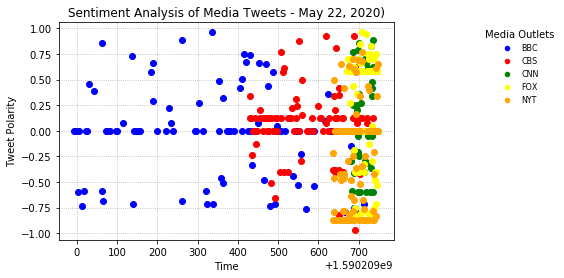

In [86]:
# Scatter plot of sentiments of the last 100 tweets pushed by each news organization
bbc_df = results_df[results_df["Search Term"]=='@bbcworld']
cbs_df = results_df[results_df['Search Term']=='@cbsnews']
cnn_df = results_df[results_df['Search Term']=='@cnn']
fox_df = results_df[results_df['Search Term']=='@foxnews']
nyt_df = results_df[results_df['Search Term']=='@nytimes']
plt.plot(bbc_df["Timestamp"], bbc_df["Compound Score"], marker="o", color = 'blue', linestyle=':', linewidth=0)
plt.plot(cbs_df["Timestamp"], cbs_df["Compound Score"], marker="o", color = 'red', linestyle=':', linewidth=0)
plt.plot(cnn_df["Timestamp"], cnn_df["Compound Score"], marker="o", color = 'green', linestyle=':', linewidth=0)
plt.plot(fox_df["Timestamp"], fox_df["Compound Score"], marker="o", color = 'yellow', linestyle=':', linewidth=0)
plt.plot(nyt_df["Timestamp"], nyt_df["Compound Score"], marker="o", color = 'orange',linestyle=':', linewidth=0)
plt.grid(linestyle='dotted')
plt.title("Sentiment Analysis of Media Tweets - May 22, 2020)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Time")
plt.legend(('BBC', 'CBS', 'CNN', 'FOX', 'NYT'),scatterpoints=1,loc='upper left',bbox_to_anchor=(1.25, 1),ncol=1,\
           fontsize=8, markerscale=0.75,title='Media Outlets',edgecolor='none',framealpha=1.00)
#plt.savefig("Sentiment_Analysis.png") 
plt.show()

## Create dataframe for second graph

In [76]:
results_df_group = results_df.groupby('Search Term')
summary_df = results_df_group['Compound Score','Positive','Neutral','Negative'].mean()
summary_df['Count'] = results_df_group['User'].count()
summary_df

,Compound Score,Positive,Neutral,Negative,Count
Search Term,,,,,
@bbcworld,-0.022465,0.06170,0.08627,0.85203,100
@cbsnews,0.071333,0.07285,0.03556,0.89159,100
@cnn,0.213426,0.09339,0.03452,0.87210,100
@foxnews,0.257444,0.11720,0.04332,0.83948,100
@nytimes,-0.229959,0.06243,0.12964,0.80772,100


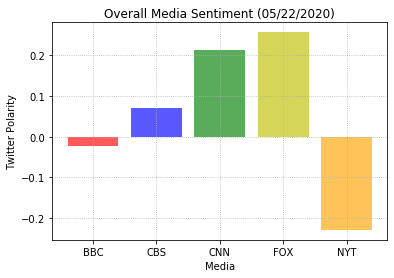

In [84]:
# Plot overall media sentiment on bar graph from summary_df
media_agg = ['BBC', 'CBS', 'CNN', 'FOX', 'NYT']
sentiment = [-0.022, 0.071, 0.213, 0.257, -0.229]
x_axis = np.arange(len(sentiment))

colors = ['r', 'b', 'g', 'y', 'orange']

plt.bar(x_axis, sentiment, color=colors, alpha=0.65, align='edge')

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.grid(linestyle='dotted')
plt.title("Overall Media Sentiment (05/22/2020)")
plt.xlabel("Media")
plt.ylabel("Twitter Polarity")

#plt.savefig("Media_Mean_Sentiment.png")
plt.show()

## Analysis
